<a href="https://colab.research.google.com/github/yungshan629/NTU-Discrete-Mathematics/blob/main/%E9%9B%A2%E6%95%A3%E6%95%B8%E5%AD%B8%E4%BD%9C%E6%A5%AD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.計算 n*n 可行路徑數
這裡分別用DFS以及排列組合公式計算路徑數。

函數說明： dfs_count(n,grid,direction)，其中用n控制搜尋的是nxn方陣，grid為要搜尋的網格，direction控制可搜尋的方向，初始設定只能向右、向下，當direction=1時，允許其向右、向下及向左、向上搜尋。


In [ ]:
import math

grid = [[0] * 15 for _ in range(15)]


'用 DFS 計算 n*n 可行路徑數'
def dfs_count(n, grid, direction):
  directions = [(1, 0), (0, 1)]
  if direction == 1:
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]  # 允許四個方向

  stack = [(0, 0, set([(0, 0)]))]
  total_paths = 0

  while stack:
    x, y, visited = stack.pop()
    if x == n - 1 and y == n - 1:
      total_paths += 1
      continue
    for dx, dy in directions:
      nx, ny = x + dx, y + dy
      # 檢查新位置是否沒有訪問過
      if 0 <= nx < n and 0 <= ny < n and grid[nx][ny] == 0 and (nx, ny) not in visited:
        new_visited = visited.copy()
        new_visited.add((nx, ny))
        stack.append((nx, ny, new_visited))

  return total_paths


'用組合公式計算 n*n 路徑數'
def comb_count(n):
  return math.comb(2*(n-1),n-1)



print(f"{'n':^{10}} {'DFS':^{10}} {'組合公式':^{10}}")
print('-' * 4 * 10)
for i in range(2, 16):
  print(f"{i:^{10}} {dfs_count(i, grid,0):^{10}} {comb_count(i):^{10}}")

    n         DFS        組合公式   
----------------------------------------
    2          2          2     
    3          6          6     
    4          20         20    
    5          70         70    
    6         252        252    
    7         924        924    
    8         3432       3432   
    9        12870      12870   
    10       48620      48620   
    11       184756     184756  
    12       705432     705432  
    13      2704156    2704156  
    14      10400600   10400600 
    15      40116600   40116600 


# 2.計算無障礙物時，最佳路徑數

假定每次移動的成本是相同的，每次能移動的步數是相同的，每次移動的距離是相同的，在無障礙物的情況下，每條路徑都剛好是n-1向右移動，及n-1向下移動，因此此時所有可行路徑都會是最佳路徑，這裡用BFS、動態規劃和Dijkstra的方式計算。






In [ ]:
import heapq
from collections import deque

grid = [[0] * 15 for _ in range(15)]


'用bfs計算最佳路徑數'
def bfs_count(n, grid, direction):
  directions = [(1, 0), (0, 1)]
  if direction == 1:
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

  queue = deque([(0, 0)])
  paths = [[0] * n for _ in range(n)]
  paths[0][0] = 1

  while queue:
    x, y = queue.popleft()
    for dx, dy in directions:
      nx, ny = x + dx, y + dy
      if 0 <= nx < n and 0 <= ny < n and grid[nx][ny] == 0:
        if paths[nx][ny] == 0:
          queue.append((nx, ny))
        paths[nx][ny] += paths[x][y]

  total_paths = paths[n-1][n-1]
  return total_paths



'用Dijkstra計算最佳路徑數'
def dij_count(n,grid,direction):
  directions = [(1, 0), (0, 1)]
  if direction == 1:
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]  # 四個方向

  dist = [[float('inf')] * n for _ in range(n)]
  paths = [[0] * n for _ in range(n)]
  dist[0][0] = 0
  paths[0][0] = 1
  pq = [(0, 0, 0)]

  while pq:
    current_dist, x, y = heapq.heappop(pq)
    if current_dist > dist[x][y]:
      continue
    for dx, dy in directions:
      nx, ny = x + dx, y + dy
      if 0 <= nx < n and 0 <= ny < n and grid[nx][ny] == 0:
        new_dist = current_dist + 1
        if new_dist < dist[nx][ny]:
          dist[nx][ny] = new_dist
          paths[nx][ny] = paths[x][y]
          heapq.heappush(pq, (new_dist, nx, ny))
        elif new_dist == dist[nx][ny]:
          paths[nx][ny] += paths[x][y]

  total_paths = paths[n-1][n-1]
  return total_paths


'用動態規畫DP計算最佳路徑數'
def DP_count(n, grid):
  paths = [[0] * n for _ in range(n)]

  for x in range(n):
    if grid[x][0] == 1:
      break
    paths[x][0] = 1

  for y in range(n):
    if grid[0][y] == 1:
      break
    paths[0][y] = 1

  for x in range(1, n):
    for y in range(1, n):
      if grid[x][y] == 1:
        paths[x][y] = 0
      else:
        paths[x][y] = paths[x-1][y] + paths[x][y-1]

  total_paths = paths[n-1][n-1]
  return total_paths




print(f"{'n':^{10}} {'DP':^{10}} {'Dijkstra':^{10}} {'BFS':^{10}}")
print('-' * 5 * 9)
for i in range(2, 16):
  print(f"{i:^{10}} {DP_count(i,grid):^{10}} {dij_count(i,grid,0):^{10}} {bfs_count(i,grid,0):^{10}}")

    n          DP      Dijkstra     BFS    
---------------------------------------------
    2          2          2          2     
    3          6          6          6     
    4          20         20         20    
    5          70         70         70    
    6         252        252        252    
    7         924        924        924    
    8         3432       3432       3432   
    9        12870      12870      12870   
    10       48620      48620      48620   
    11       184756     184756     184756  
    12       705432     705432     705432  
    13      2704156    2704156    2704156  
    14      10400600   10400600   10400600 
    15      40116600   40116600   40116600 


# 3. 繪製圖形
為方便圖形繪製，此處用組合公式計算無障礙下的最佳路徑數。
用stirling公式逼近，可以知道路徑數會以
$4^{n^*}/\sqrt{π{n^*}}$
的速度成長，較$3^{n^*}$快，較$4^{n^*}$慢

註：此處$n^*$ 為 $n-1$

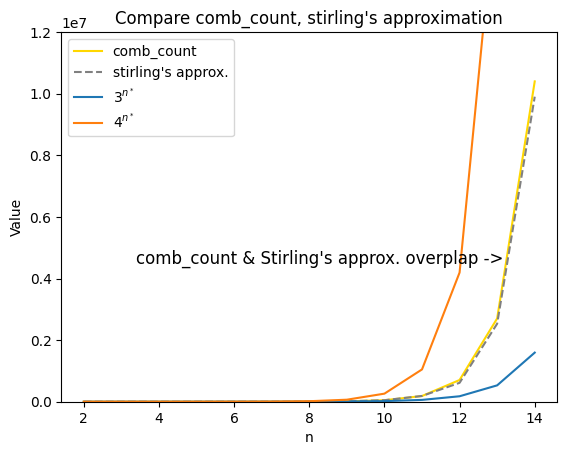

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2, 15)
comb_counts = [comb_count(n) for n in x]
stirling = np.empty_like(x)
stirling[x < 12] = (4**(x[x < 12]-1))/((3.14*(x[x < 12]-1))**0.5)
#將 stirling's approx. 向下偏移，以利圖形顯示
stirling[10] = (4**(11))/((3.14*(11))**0.5)-0.01*1e7
stirling[11] = (4**(12))/((3.14*(12))**0.5)-0.02*1e7
stirling[12] = (4**(13))/((3.14*(13))**0.5)-0.06*1e7

cube = 3**(x-1)
four = 4**(x-1)

# 繪圖
plt.plot(x, comb_counts, label='comb_count',color='gold')
plt.plot(x, stirling, label='stirling\'s approx.', linestyle='--',color='grey')
plt.plot(x, cube, label='$3^{n^*}$')
plt.plot(x, four, label='$4^{n^*}$')
plt.xlabel('n')
plt.ylabel('Value')
plt.title('Compare comb_count, stirling\'s approximation')
plt.legend()
plt.text(3.4, 0.45*1e7, 'comb_count & Stirling\'s approx. overplap ->', fontsize=12)
plt.ylim(bottom=0, top=1.2*1e7)


plt.show()

# 4. 生成障礙物，計算不同密度對路徑數的影響
由於DFS的運算速度較慢，因此這裡使用 BFS、DP 和 Dijkstra 尋找最佳路徑數，最後計算在不同密度低下，(平均)最佳路徑數的變化。

如模擬的結果所示，在障礙物的密度提高後，最佳路徑數會急速的減少，尤其是當密度由0.3提高至0.4的時候，最佳路徑數會斷崖式的降至0。


In [ ]:
import random

'生成網格，並隨機產生障礙物'
def grid_withobs(n, density):
  grid = [[0] * n for _ in range(n)]
  for i in range(n):
    for j in range(n):
      if random.random() < density:
        grid[i][j] = 1
  grid[0][0] = 0    # 強制起點和終點沒有障礙物，故演算法不用重覆檢查
  grid[n-1][n-1] = 0
  return grid

'模擬不同density下，最佳路徑數的變化'

n=252
densities=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

print(f"{'density':^{10}} {'DP':^{10}} {'Dijkstra':^{10}} {'BFS':^{10}}")
print('-' * 5 * 9)
for den in densities:
  res1 = []
  res2 = []
  res3 = []
  for _ in range(1000):  # 1000次模拟
    grid = grid_withobs(n, den)
    res1.append(DP_count(n, grid))
    res2.append(dij_count(n, grid,0))
    res3.append(bfs_count(n, grid,0))
  if sum(res1)/1000 > 1.0e+10:
    print(f"{den:^{10}} {sum(res1)/1000:^{10}.2e} {sum(res2)/1000:^{10}.2e} {sum(res3)/1000:^{10}.2e}")
  else:
    print(f"{den:^{10}} {sum(res1)/1000:^{10}.2f} {sum(res2)/1000:^{10}.2f} {sum(res3)/1000:^{10}.2f}")


 density       DP      Dijkstra     BFS    
---------------------------------------------
   0.1     5.43e+126  5.43e+126  5.43e+126 
   0.2      3.21e+99   3.21e+99   3.21e+99 
   0.3      1.66e+63   1.66e+63   1.66e+63 
   0.4        0.00       0.00       0.00   
   0.5        0.00       0.00       0.00   
   0.6        0.00       0.00       0.00   
   0.7        0.00       0.00       0.00   
   0.8        0.00       0.00       0.00   
   0.9        0.00       0.00       0.00   


# 5. 不同演算法分析
在先前的計算中，我分別採用了公式解、DFS(深度優先)、BFS(廣度優先)、DP(動態規畫)以及Dijkstra法。其中，公式解只適用於無障礙物的環境，快速但泛用性較低。其次，DFS會遍歷每個可能的路線，雖然能算出各個可行路徑，但同時亦較為費時。BFS、DP和Dijkstra這些搜尋方式，主要是搜尋最佳路徑，最壞的情況下時間複雜度差不多。在我進行1000次100*100網格、障礙物密度0.2的模擬中，DP運行速度最快，其次為BFS，Dijkstra稍慢於前兩者，不過差距甚微。

除此之外，在後續的測試中，也可以看出不同演算法在尋找路徑時會有不同結果。在允許移動方向往四個方向搜尋後，DFS能搜尋出最多可行路徑數，這其中包括一些無效率的路徑。BFS傾向於搜尋最佳路徑，不過在一些模擬中，BFS也會搜尋出一些非最佳路徑。Dijkstra則能較有效的搜尋最佳路徑。動態規畫亦是以找到最佳路徑為主，某些特殊情況下，動態規畫會找不到路徑。

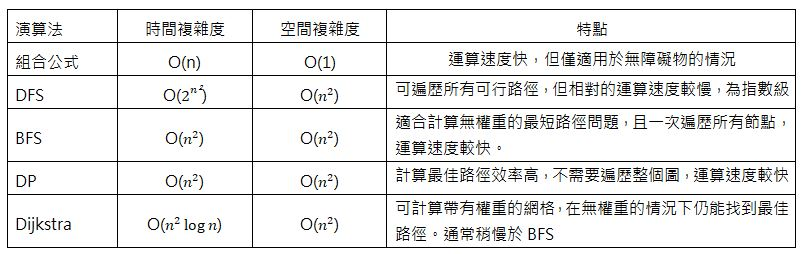


不同演算法適用不同場景，有些場景可能需要多種演算法互相搭配。
*   機器人路徑規畫：像是掃地機器人，或是送餐機器人，要到達指定位置，就需要找到最佳路徑解，運算速度快的BFS、DP 和 Dijkstra 都適合處理這類問題。
*   遊戲設計：在遊戲地圖設計中，可以利用這個演算法生成不同難度的迷宮或關卡。DFS可遍歷所有路徑，適合用於此處控制遊戲難易度。或是數獨類的解迷遊戲，亦適合用DFS尋找各種可能的解法。
*   物流配送：像是導航的最佳路徑顯然需要速度快的演算法。由於實際道路會有擁擠程度上的不同，成本上的不同(過路費)，因此像是 DP、Dijkstra 適合處理這類帶有權重的路徑規畫問題。
*   芯片設計：在芯片設計中，可以利用這些演算法來優化佈線，減少芯片面積。


In [ ]:
import random
import time

n=100

bfs_times = []
dij_times = []
DP_times = []

for _ in range(1000):
  grid=grid_withobs(n, 0.2)
  start01=time.time()
  bfs_count(n, grid, 0)
  bfs_times.append(time.time()-start01)
  start02=time.time()
  dij_count(n, grid, 0)
  dij_times.append(time.time()-start02)
  start03=time.time()
  DP_count(n, grid)
  DP_times.append(time.time()-start03)

average_bfs_time = sum(bfs_times) / 1000
average_dij_time = sum(dij_times) / 1000
average_DP_time = sum(DP_times) / 1000
print(f"{'BFS':^{7}} {'Dijkstra':^{7}} {'DP':^{6}}")
print(f"{average_bfs_time:.5f} {average_dij_time:.5f} {average_DP_time:.5f}")

  BFS   Dijkstra   DP  
0.00537 0.00799 0.00272


# 6. 放寬移動限制
在先前的運算中，由於限制了移動方式，只能向右及向下，沒有回頭、繞路的機會，因此無論是無障礙物或是有障物的情況下，可行路徑都會等於最佳(最短)路徑。不過在這樣的移動限制下，有些可行路徑不會被發現，甚至一些最佳路徑也會因此找不到。以下用5個圖說明放寬移動限制後各個演算法的搜尋結果，可以看到沒有移動限制的Dijkstra在找尋最佳路徑時是相對可靠的。此外，重作先前障礙物密度的模擬，門檻值會由0.3提高為0.4。

另外，DP的計算邏輯本就隱含向右、向下的限制，即使在函數中加入從右進入、從下進入（向左向下）的狀態轉換方程式，也會因為迴圈的運轉方向不起作用，反向加總亦不行，故此處不再改寫DP函數。

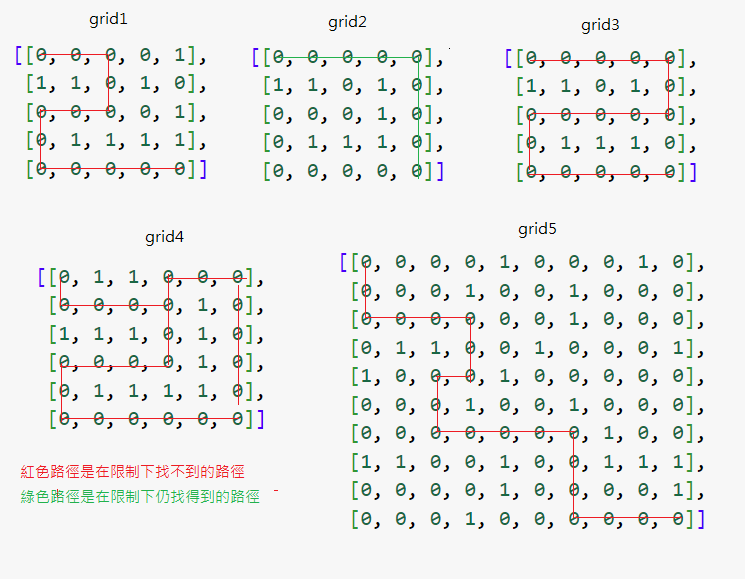

In [ ]:
from collections import deque
import numpy as np

grid1 = [[0, 0, 0, 0, 1],
         [1, 1, 0, 1, 0],
         [0, 0, 0, 0, 1],
         [0, 1, 1, 1, 1],
         [0, 0, 0, 0, 0]]

grid2 = [[0, 0, 0, 0, 0],
         [1, 1, 0, 1, 0],
         [0, 0, 0, 1, 0],
         [0, 1, 1, 1, 0],
         [0, 0, 0, 0, 0]]

grid3 = [[0, 0, 0, 0, 0],
         [1, 1, 0, 1, 0],
         [0, 0, 0, 0, 0],
         [0, 1, 1, 1, 0],
         [0, 0, 0, 0, 0]]

grid4 = [[0, 1, 1, 0, 0, 0],
         [0, 0, 0, 0, 1, 0],
         [1, 1, 1, 0, 1, 0],
         [0, 0, 0, 0, 1, 0],
         [0, 1, 1, 1, 1, 0],
         [0, 0, 0, 0, 0, 0]]

grid5 = [[0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
         [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 1, 1, 0, 0, 1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
         [1, 1, 0, 0, 1, 0, 0, 1, 1, 1],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]]


'測試在不同方向限制下的搜尋結果'

grids = [grid1, grid2, grid3, grid4, grid5]
gridss= ['grid1', 'grid2', 'grid3', 'grid4', 'grid5']

print(f"{' ':^{4}} {'限制只能向右向下移動':^{16}} {'允許往四方移動':^{18}}")
print(f"{'網格':^{5}} {'DFS':^{5}} {'BFS':^{5}}  {'Dijkstra':^{5}} {'':{1}} {'DFS':^{5}} {'BFS':^{5}}  {'Dijkstra':^{5}}")
print(f"{' ':^{5}}", '-' * 22, ' '*2, '-' * 22)

for i in range(5):
  grid = grids[i]
  n=len(grid)
  name=gridss[i]

  print(f"{name:^{7}} {dfs_count(n,grid,0):^{5}} {bfs_count(n,grid,0):^{5}}  {dij_count(n,grid,0):^{5}} {'':{4}} {dfs_count(n,grid,1):^{5}} {bfs_count(n,grid,1):^{5}}  {dij_count(n,grid,1):^{5}} ")



'沒有方向限制下，不同density最佳路徑數的變化'

n=100
densities=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

print(' ')
print(' ')
print(f"{'density':^{10}} {'Dijkstra':^{10}} {'BFS':^{10}}")
print('-' * 3 * 10)
for den in densities:
  res1 = []
  res2 = []
  res3 = []
  for _ in range(1000):  # 1000次模拟
    grid = grid_withobs(n, den)
    res2.append(dij_count(n, grid,1))
    res3.append(bfs_count(n, grid,1))
  if sum(res2)/1000 > 1.0e+10:
    print(f"{den:^{10}}  {sum(res2)/1000:^{10}.2e} {sum(res3)/1000:^{10}.2e}")
  else:
    print(f"{den:^{10}}  {sum(res2)/1000:^{10}.2f} {sum(res3)/1000:^{10}.2f}")



        限制只能向右向下移動         允許往四方移動      
 網格    DFS   BFS   Dijkstra    DFS   BFS   Dijkstra
      ----------------------    ----------------------
 grid1    0     0      0          1     1      1   
 grid2    1     1      1          2     2      1   
 grid3    2     2      2          4     4      2   
 grid4    0     0      0          2     2      1   
 grid5    0     0      0        153216  60     60   
 
 
 density    Dijkstra     BFS    
------------------------------
   0.1       2.05e+49   2.05e+49 
   0.2       7.37e+38   8.16e+38 
   0.3       4.36e+28   4.36e+28 
   0.4       1.46e+22   1.46e+22 
   0.5         0.00       0.00   
   0.6         0.00       0.00   
   0.7         0.00       0.00   
   0.8         0.00       0.00   
   0.9         0.00       0.00   


# 7. 有權重的例子
Dijkstra可以處理有權重的例子。這裡假設n*n的方陣中，有一半徑為r的圓，圓以內的路徑權重較高，隨機產生障礙物，用Dijkstra法尋找最佳路徑，並繪出路徑。測試結果，多數時候最佳路徑會繞過圓，或是盡可能不經過圓。


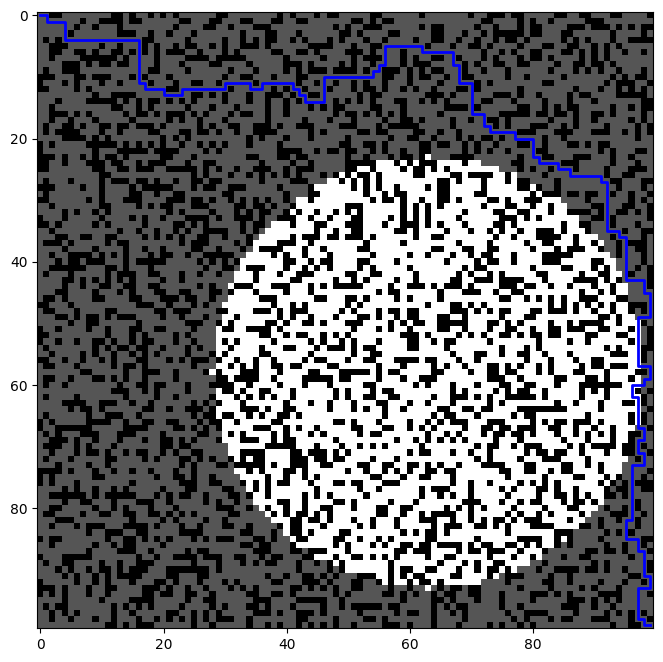

Total number of paths: 59808662323200000


In [ ]:
import heapq
import matplotlib.pyplot as plt
import numpy as np
import random

'產生 n*n grid, 其中有一半徑 r 的圓, 位置隨機. 並隨機產生障礙物'

def weighted_grid(n, density, r):
  grid = [[0] * n for _ in range(n)]
  for i in range(n):
    for j in range(n):
      if random.random() < density:
        grid[i][j] = -1  # 和權重做區分，障礙物設為 -1

  # 半徑為 r 的市中心
  center_x = random.randint(r, n - r)
  center_y = random.randint(r, n - r)

  for i in range(n):
    for j in range(n):
      if grid[i][j] != -1:
        if (i - center_x) ** 2 + (j - center_y) ** 2 <= r ** 2:
          grid[i][j] = 2
  grid[0][0] = 0
  grid[n-1][n-1] = 0

  return grid

'修改 Dijkstra 演算法'
def dij_count(n, grid, direction):
  directions = [(1, 0), (0, 1)]
  if direction == 1:
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

  dist = [[float('inf')] * n for _ in range(n)]
  paths = [[0] * n for _ in range(n)]
  prev = [[None] * n for _ in range(n)]
  dist[0][0] = 0
  paths[0][0] = 1
  pq = [(0, 0, 0)]

  while pq:
    current_dist, x, y = heapq.heappop(pq)
    if current_dist > dist[x][y]:
      continue
    for dx, dy in directions:
      nx, ny = x + dx, y + dy
      if 0 <= nx < n and 0 <= ny < n and grid[nx][ny] != -1:
        weight = grid[nx][ny] if grid[nx][ny] != 0 else 1
        new_dist = current_dist + weight
        if new_dist < dist[nx][ny]:
          dist[nx][ny] = new_dist
          paths[nx][ny] = paths[x][y]
          prev[nx][ny] = (x, y)  # 標記節點
          heapq.heappush(pq, (new_dist, nx, ny))
        elif new_dist == dist[nx][ny]:
          paths[nx][ny] += paths[x][y]
  path = []
  x, y = n-1, n-1
  while prev[x][y] is not None:
    path.append((x, y))
    x, y = prev[x][y]
  path.append((0, 0))
  path.reverse()

  return paths[n-1][n-1], path

'繪路徑圖'
def plot_path(grid, path):
  plt.figure(figsize=(8, 8))
  plt.imshow(grid, cmap='gray', origin='upper')

  if path:
    x, y = zip(*path)
    plt.plot(y, x, color='blue', linewidth=2)

  plt.show()


n = 100
grid = weighted_grid(n, 0.35, 35)
total_paths, path = dij_count(n, grid, 1)
plot_path(grid, path)

print("Total number of paths:", total_paths)